Definição das funções e coisas gerais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
faixas = [0,18,23, 28, 33,38,43,48,53,58,200]
def abrirArquivo(path,faixa):
    df = pd.read_excel(path)
    df = df.fillna(0)
    df['idade'] = df['idade'].apply(np.floor)
    cut = pd.cut(df['idade'],faixas,include_lowest=True)
    df['faixas'] = cut
    cut = cut.cat.rename_categories(['Faixa 1','Faixa 2','Faixa 3','Faixa 4','Faixa 5','Faixa 6','Faixa 7','Faixa 8','Faixa 9','Faixa 10'])
    df['faixas_num'] = cut
    df['total_unit'] = df['vl_unit']*df['qtde']
    return df

def groupbySum(df,groupby:list,sum):
    df = df.groupby(groupby)[sum].sum(sum).reset_index()
    return(df)

def groupbyCount(df,groupby:list,count):
    df = df.groupby(groupby)[count].count().reset_index()
    return(df)

def sortHead(df,sort,ascending:bool,head):
    df = df.sort_values(sort,ascending=ascending).head(head)
    return df

def doppler(df,string):
    df['Ano'] = df['atend'].dt.year
    query = df.query(f'servico.str.contains("{string}")')
    query = query.groupby(['Ano']).sum('total_unit')
    return(query[['qtde','total_unit']])

def diferenca(df,max,min):
    df['max'] = df['vl_ref']*max
    df['min'] = df['vl_ref']*min
    query = df.query(f'vl_unit > max or vl_unit < min')['qtde'].count()
    return(query)

def grafico(df,groupby:list,sum):
    fds = groupbySum(df,groupby,sum)
    fig, ax = plt.subplots()
    ax.pie(fds[sum],labels=fds[groupby],autopct='%1.1f%%', pctdistance=0.75, textprops={'size': 'smaller'},radius=1.35)
    return plt.show()

contas = abrirArquivo('Contas.xlsx',faixas)


Quantidade de serviços prestados por sexo e faixa etária  

In [2]:
groupbySum(contas.copy(),['sexo','faixas'],'qtde')


,sexo,faixas,qtde
0,F,"(-0.001, 18.0]",245
1,F,"(18.0, 23.0]",126
2,F,"(23.0, 28.0]",89
3,F,"(28.0, 33.0]",54
4,F,"(33.0, 38.0]",116
5,F,"(38.0, 43.0]",119
6,F,"(43.0, 48.0]",138
7,F,"(48.0, 53.0]",203
8,F,"(53.0, 58.0]",283
9,F,"(58.0, 200.0]",737


Quantidade de pessoas atendidas por sexo e faixa etária 

In [3]:
groupbyCount(contas.copy(),['sexo','faixas'],'qtde')


,sexo,faixas,qtde
0,F,"(-0.001, 18.0]",74
1,F,"(18.0, 23.0]",34
2,F,"(23.0, 28.0]",19
3,F,"(28.0, 33.0]",10
4,F,"(33.0, 38.0]",27
5,F,"(38.0, 43.0]",32
6,F,"(43.0, 48.0]",45
7,F,"(48.0, 53.0]",60
8,F,"(53.0, 58.0]",85
9,F,"(58.0, 200.0]",188


Total de valor cobrado por plano, por sexo e faixa etária 

In [4]:
groupbySum(contas.copy(),['plano','sexo','faixas'],'total_unit')


,plano,sexo,faixas,total_unit
0,1001,F,"(-0.001, 18.0]",0.000000
1,1001,F,"(18.0, 23.0]",0.000000
2,1001,F,"(23.0, 28.0]",942.644355
3,1001,F,"(28.0, 33.0]",0.000000
4,1001,F,"(33.0, 38.0]",0.000000
...,...,...,...,...
3975,1200,M,"(38.0, 43.0]",0.000000
3976,1200,M,"(43.0, 48.0]",0.000000
3977,1200,M,"(48.0, 53.0]",119.192036
3978,1200,M,"(53.0, 58.0]",0.000000


10 serviços com maiores valores cobrados 

In [5]:
sortHead(contas.copy(),'total_unit',False,10)


,matric,sexo,idade,atend,tuss,servico,plano,vl_unit,vl_ref,qtde,faixas,faixas_num,total_unit
245,10945,M,62.0,2017-06-19,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1166,654.417344,409.01084,81,"(58.0, 200.0]",Faixa 10,53007.804864
258,12364,M,64.0,2017-07-03,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1166,633.966802,409.01084,77,"(58.0, 200.0]",Faixa 10,48815.443754
34,14329,F,27.0,2015-11-26,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1165,711.678862,409.01084,31,"(23.0, 28.0]",Faixa 3,22062.044710
832,13818,F,78.0,2017-07-19,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1171,678.957994,409.01084,31,"(58.0, 200.0]",Faixa 10,21047.697826
233,13302,M,64.0,2017-07-03,40901238,OBSTETRICA,1013,760.763027,409.01238,25,"(58.0, 200.0]",Faixa 10,19019.075670
860,14895,F,78.0,2017-07-21,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1176,511.263550,409.01084,31,"(58.0, 200.0]",Faixa 10,15849.170050
226,12200,M,62.0,2017-06-19,40901238,OBSTETRICA,1084,494.904980,409.01238,30,"(58.0, 200.0]",Faixa 10,14847.149394
240,10026,F,61.0,2017-08-17,40901084,ECODOPPLERCARDIOGRAMA FETAL COM MAPEAMENTO DE ...,1164,462.182249,409.01084,31,"(58.0, 200.0]",Faixa 10,14327.649725
239,10986,F,78.0,2017-07-19,40901238,OBSTETRICA,1115,650.329684,409.01238,22,"(58.0, 200.0]",Faixa 10,14307.253052
25,11187,F,40.0,2014-12-19,18020046,"PSICOTERAPIA INDIV-(INFATIL,ADOL,ADULTO)",1092,322.558823,180.20046,40,"(38.0, 43.0]",Faixa 6,12902.352936


Quantidade e o total cobrado de exames de EcoDopplerCardiograma em um determinado ano. Este resultado será um dos subsídios para avaliar o ROI desse tipo de exame, considerando-se o custo do leasing e o TCO dos equipamentos. 

In [6]:
doppler(contas.copy(),"ECODOPPLERCARDIOGRAMA")


,qtde,total_unit
Ano,,
2015,44,32164.612458
2016,25,16544.487792
2017,269,164561.420002
2018,6,3525.672967


Quantidade de exames com valores unitários 30% acima ou abaixo do valor de referência. 

In [7]:
diferenca(contas.copy(),1.3,0.7)


724

Um gráfico de pizza do total de valor por faixa etária. 

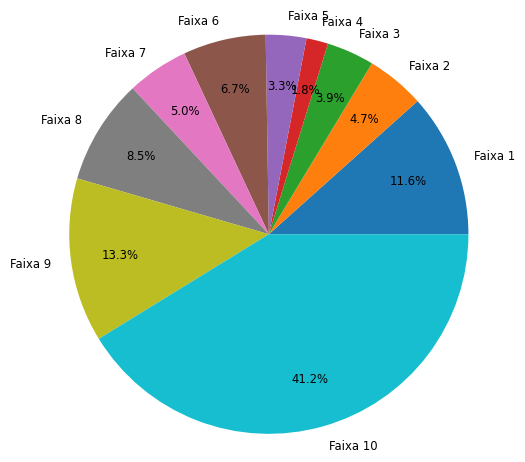

In [8]:
grafico(contas.copy(),'faixas_num','total_unit')